
=== Reporte de Clasificación (Gradient Descent) ===
              precision    recall  f1-score   support

         bad       0.54      0.45      0.49        60
        good       0.78      0.84      0.81       140

    accuracy                           0.72       200
   macro avg       0.66      0.64      0.65       200
weighted avg       0.71      0.72      0.71       200



c:\Users\MaoYeral\miniconda3\envs\ML_2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


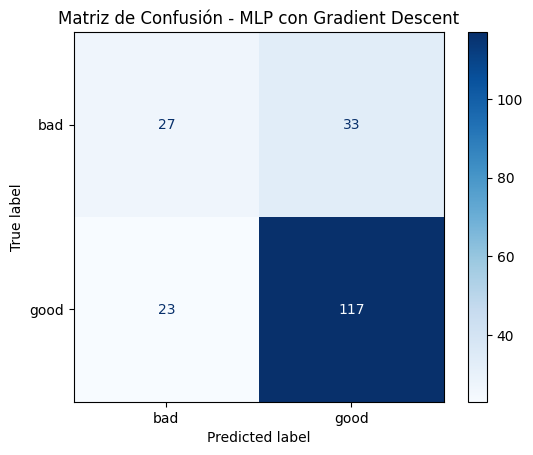

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# 1. Cargar el dataset German Credit desde OpenML
X, y = fetch_openml(name='credit-g', version=1, as_frame=True, return_X_y=True)

# 2. Separar columnas categóricas y numéricas
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()

# 3. Definir transformaciones (OneHotEncoder + StandardScaler)
column_transform = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), cat_cols),
    (StandardScaler(), num_cols),
    remainder='passthrough'
)

# 4. Crear pipeline con solver='sgd' para usar Gradient Descent
mlp_pipeline = make_pipeline(
    column_transform,
    MLPClassifier(
        hidden_layer_sizes=(16, 8),
        activation='tanh',
        solver='sgd',             # <-- For Gradient Descent
        learning_rate_init=0.01,  # Tasa de aprendizaje
        momentum=0.9,            # Moméntum (opcional)
        max_iter=300,
        random_state=42
    )
)

# 5. Dividir en entrenamiento y prueba (stratify para balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 6. Entrenar (fit) la tubería
mlp_pipeline.fit(X_train, y_train)

# 7. Predicciones y reporte
y_pred = mlp_pipeline.predict(X_test)
print("\n=== Reporte de Clasificación (Gradient Descent) ===")
print(classification_report(y_test, y_pred))

# 8. Matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=mlp_pipeline.steps[-1][1].classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=mlp_pipeline.steps[-1][1].classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión - MLP con Gradient Descent")
plt.show()